<a href="https://colab.research.google.com/github/Iteba/Data-Science-Practice/blob/main/Ad_Sales_Prediction_Linear_Regression_Practice/Ad_Sales_Prediction_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/Iteba/Data-Science-Practice/refs/heads/main/Ad_Sales_Prediction_Linear_Regression_Practice/advertising.csv'
df = pd.read_csv(url)

# Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
df.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


# Preprocessing

In [8]:
X = df.drop('Sales', axis = 1)
y = df['Sales']

## Feature Selection

In [10]:
X.drop(['Unnamed: 0'], axis=1, inplace=True)

## Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [16]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Data Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Training

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

## Predictions vs Target Correlation

In [23]:
predictions = model.predict(X_test)

In [24]:
predictions

array([12.5893486 ,  6.57466309, 15.51569107,  9.76164334, 14.08560255,
       20.17829056, 12.32800513, 19.82963814, 14.87331552, 10.31222767,
       10.12322859, 20.67028922,  6.53084946,  6.01905104,  3.57991965,
       11.29258057, 13.14446753, 15.95278361,  7.79731662, 18.014187  ,
        7.55638624, 11.66008132, 10.74032853,  7.35587039, 22.10561982,
       10.2894642 , 10.54321563, 14.89639115, 10.0460676 , 20.54318186,
        9.63429763, 21.12541362, 24.01131416,  6.77913882, 15.12282694,
       19.16513974, 18.44896906, 19.54139302, 16.23003217,  9.43340198])

Text(0.5, 1.0, 'Predicted vs Actual Sales')

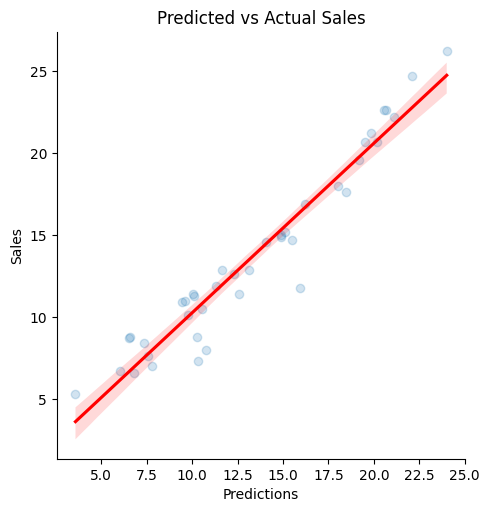

In [25]:
sns.lmplot(
    x='Predictions',
    y='Sales',
    data = pd.DataFrame(
        {
            'Sales': y_test,
            'Predictions': predictions
        }
    ),
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.2}
)
plt.xlabel = 'Predicted Sales'
plt.ylabel = 'Sales'
plt.title('Predicted vs Actual Sales')


## Error

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))

Mean Absolute Error:  1.1488160961781833
Mean Squared Error:  2.2030129791028514


## Accuracy

In [28]:
from sklearn.metrics import r2_score

In [30]:
r2 = r2_score(y_test, predictions)

In [31]:
print('R2: ', r2)

R2:  0.9288609285248163
